## Australian rainfall prediction

Goal: **To predict the next-day rain based on other atmospheric features**
    
Dataset: This dataset comprises a decade of daily weather observations from multiple locations across Australia. 

Source: https://www.kaggle.com/datasets/arunavakrchakraborty/australia-weather-data

### Data Description:
    
**Location** - Name of the city from Australia.

**MinTemp/MaxTemp** - The minimum/maximum temperature during a particular day. (degree Celsius)

**Rainfall** - Rainfall during a particular day. (millimeters)

**Evaporation** - Evaporation during a particular day. (millimeters)

**Sunshine** - Bright sunshine during a particular day. (hours)

**WindGusDir** - The direction of the strongest gust during a particular day. (16 compass points)

**WindGuSpeed** - Speed of strongest gust during a particular day. (kilometers per hour)

**WindDir9am / WindDir3pm** - The direction of the wind for 10 min prior to 9 am. / 3pm. (compass points)

**WindSpeed9am / WindSpeed3pm** - Speed of the wind for 10 min prior to 9 am. / 3pm. (kilometers per hour)

**Humidity9am / Humidity3pm** - The humidity of the wind at 9 am. / 3pm. (percent)

**Pressure9am / Pressure3pm** - Atmospheric pressure at 9 am. / 3pm. (hectopascals)

**Cloud9am / Cloud3pm** - Cloud-obscured portions of the sky at 9 am. / 3pm.(eighths)

**Temp9am / Temp3pm** - The temperature at 9 am. / 3pm.(degree Celsius)

**RainToday** - If today is rainy then ‘Yes’. If today is not rainy then ‘No’.

**RainTomorrow** - If tomorrow is rainy then 1 (Yes). If tomorrow is not rainy then 0 (No).

<div class="alert alert-block alert-success">The variables below were not presented in original dataset. However, I thought it would be wise to add regions and coordinates in order to plot the cities on the map (which I prepared in Tableau). Always better to see where the places  we are taking about are.

**State/Province** - State/Province of the locations in Australia

**Longitute/Latitude** - Coordinates of mentioned cities
</div>

It's a pity that there is no information about the date, however when we plot some variables I'm sure we will receive some seasonal trends in the data for example in min max temperature. 

Why do we measure "clouds", "wind direction","humidity","temperature" at 9am and 3pm? 

It is also important to become acquainted with Australian climate especially in respect of rainfall before we will immerse in the analysis of our dataset. Here are some key aspects:
    
1. Australia is located in the Southern Hemisphere and is surrounded by oceans (Southern Ocean,Pacific Ocean, Indian Ocean) and seas (Timor Sea,Arafura Sea,Coral Sea, Tasman Sea).
2. Dry and arid regions particularly in the central and western regions. These areas experience hot and dry conditions for much of the year, with limited rainfall. They are characterized by vast deserts, such as the Simpson Desert and the Great Victoria Desert.
3. Northern parts of Australia have tropical / subtropical climate - wet/dry seasons; monsoon seasons (wet) - from November to April,heavy rainfall,tropical cyclones; dry seasons - from May to October, lower humidity, clear skies
4. Southern / Southeastern regions have temparate climate - mild winters, moderate summers, rainfall throughout the year
5. Southern / Southwestern parts have mediterranean climate - mild, wet winters and hot,dry summers
6. Apline climate in southeastern regions (particularly the Australian Alps) - cold winters,snowfall,cool summers, higher rainfall due to orographic effects(rainfall caused by the lifting of moist air over mountains)
7. Coastale areas have mild temperatures and high humidity
8. Australia is prone to natural disasters, including tropical cyclones in the north and bushfires in various parts of the country.

To conclude: Australia's climate is highly diverse and can be broadly classified into several distinct regions based on precipitation patterns

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
raw_data=pd.read_csv("Weather Data.csv")
raw_data.head()

,row ID,Location,State/Province,Latitude,Longitute,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,New South Wales,-36.0737,146.9135,13.4,22.9,0.6,NaN,NaN,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,New South Wales,-36.0737,146.9135,7.4,25.1,0.0,NaN,NaN,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,New South Wales,-36.0737,146.9135,17.5,32.3,1.0,NaN,NaN,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,New South Wales,-36.0737,146.9135,14.6,29.7,0.2,NaN,NaN,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,New South Wales,-36.0737,146.9135,7.7,26.7,0.0,NaN,NaN,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [3]:
weather_data = raw_data.copy()
weather_data = weather_data.drop(['row ID'],axis=1)
weather_data.info()
# 25 columns, 99516 rows
#there are some nulls 
#types: object, float64,int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        99516 non-null  object 
 1   State/Province  99516 non-null  object 
 2   Latitude        99516 non-null  float64
 3   Longitute       99516 non-null  float64
 4   MinTemp         99073 non-null  float64
 5   MaxTemp         99286 non-null  float64
 6   Rainfall        98537 non-null  float64
 7   Evaporation     56985 non-null  float64
 8   Sunshine        52199 non-null  float64
 9   WindGustDir     92995 non-null  object 
 10  WindGustSpeed   93036 non-null  float64
 11  WindDir9am      92510 non-null  object 
 12  WindDir3pm      96868 non-null  object 
 13  WindSpeed9am    98581 non-null  float64
 14  WindSpeed3pm    97681 non-null  float64
 15  Humidity9am     98283 non-null  float64
 16  Humidity3pm     97010 non-null  float64
 17  Pressure9am     89768 non-null 

In [4]:
weather_data.shape

(99516, 25)

In [5]:
pd.set_option('display.max_columns', None) #to see all the columns; None - meaning there will be no limit to the number of columns displayed
weather_data.describe(include="all")

,Location,State/Province,Latitude,Longitute,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,99516,99516,99516.000000,99516.000000,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,92995,93036.000000,92510,96868,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,98537,99516.000000
unique,49,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,Canberra,New South Wales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W,NaN,N,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,2393,29037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6843,NaN,8052,7410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76481,NaN
mean,NaN,NaN,-32.757384,142.072181,12.176266,23.218513,2.353024,5.46132,7.615090,NaN,39.976966,NaN,NaN,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,NaN,0.224677
std,NaN,NaN,6.013438,12.077971,6.390882,7.115072,8.487866,4.16249,3.783008,NaN,13.581524,NaN,NaN,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,NaN,0.417372
min,NaN,NaN,-42.882100,115.100700,-8.500000,-4.100000,0.000000,0.00000,0.000000,NaN,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,NaN,0.000000
25%,NaN,NaN,-36.073700,138.600700,7.600000,17.900000,0.000000,2.60000,4.800000,NaN,31.000000,NaN,NaN,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,NaN,0.000000
50%,NaN,NaN,-33.946200,145.834100,12.000000,22.600000,0.000000,4.80000,8.400000,NaN,39.000000,NaN,NaN,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,NaN,0.000000
75%,NaN,NaN,-31.498100,150.737800,16.800000,28.200000,0.800000,7.40000,10.600000,NaN,48.000000,NaN,NaN,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,NaN,0.000000


In [6]:
#Missing values
NA_data = weather_data.isnull().sum()
NA_data

Location              0
State/Province        0
Latitude              0
Longitute             0
MinTemp             443
MaxTemp             230
Rainfall            979
Evaporation       42531
Sunshine          47317
WindGustDir        6521
WindGustSpeed      6480
WindDir9am         7006
WindDir3pm         2648
WindSpeed9am        935
WindSpeed3pm       1835
Humidity9am        1233
Humidity3pm        2506
Pressure9am        9748
Pressure3pm        9736
Cloud9am          37572
Cloud3pm          40002
Temp9am             614
Temp3pm            1904
RainToday           979
RainTomorrow          0
dtype: int64

In [7]:
NA_percentage = round(NA_data / weather_data.shape[0] *100,1)

In [8]:
print("Percentage of missing values in each column: \n{}".format(NA_percentage))

Percentage of missing values in each column: 
Location           0.0
State/Province     0.0
Latitude           0.0
Longitute          0.0
MinTemp            0.4
MaxTemp            0.2
Rainfall           1.0
Evaporation       42.7
Sunshine          47.5
WindGustDir        6.6
WindGustSpeed      6.5
WindDir9am         7.0
WindDir3pm         2.7
WindSpeed9am       0.9
WindSpeed3pm       1.8
Humidity9am        1.2
Humidity3pm        2.5
Pressure9am        9.8
Pressure3pm        9.8
Cloud9am          37.8
Cloud3pm          40.2
Temp9am            0.6
Temp3pm            1.9
RainToday          1.0
RainTomorrow       0.0
dtype: float64


In [9]:
#Insights: 
#1. Are the missing values clustered in specific regions? 
#2. Better to start from numeric or categorical features? 

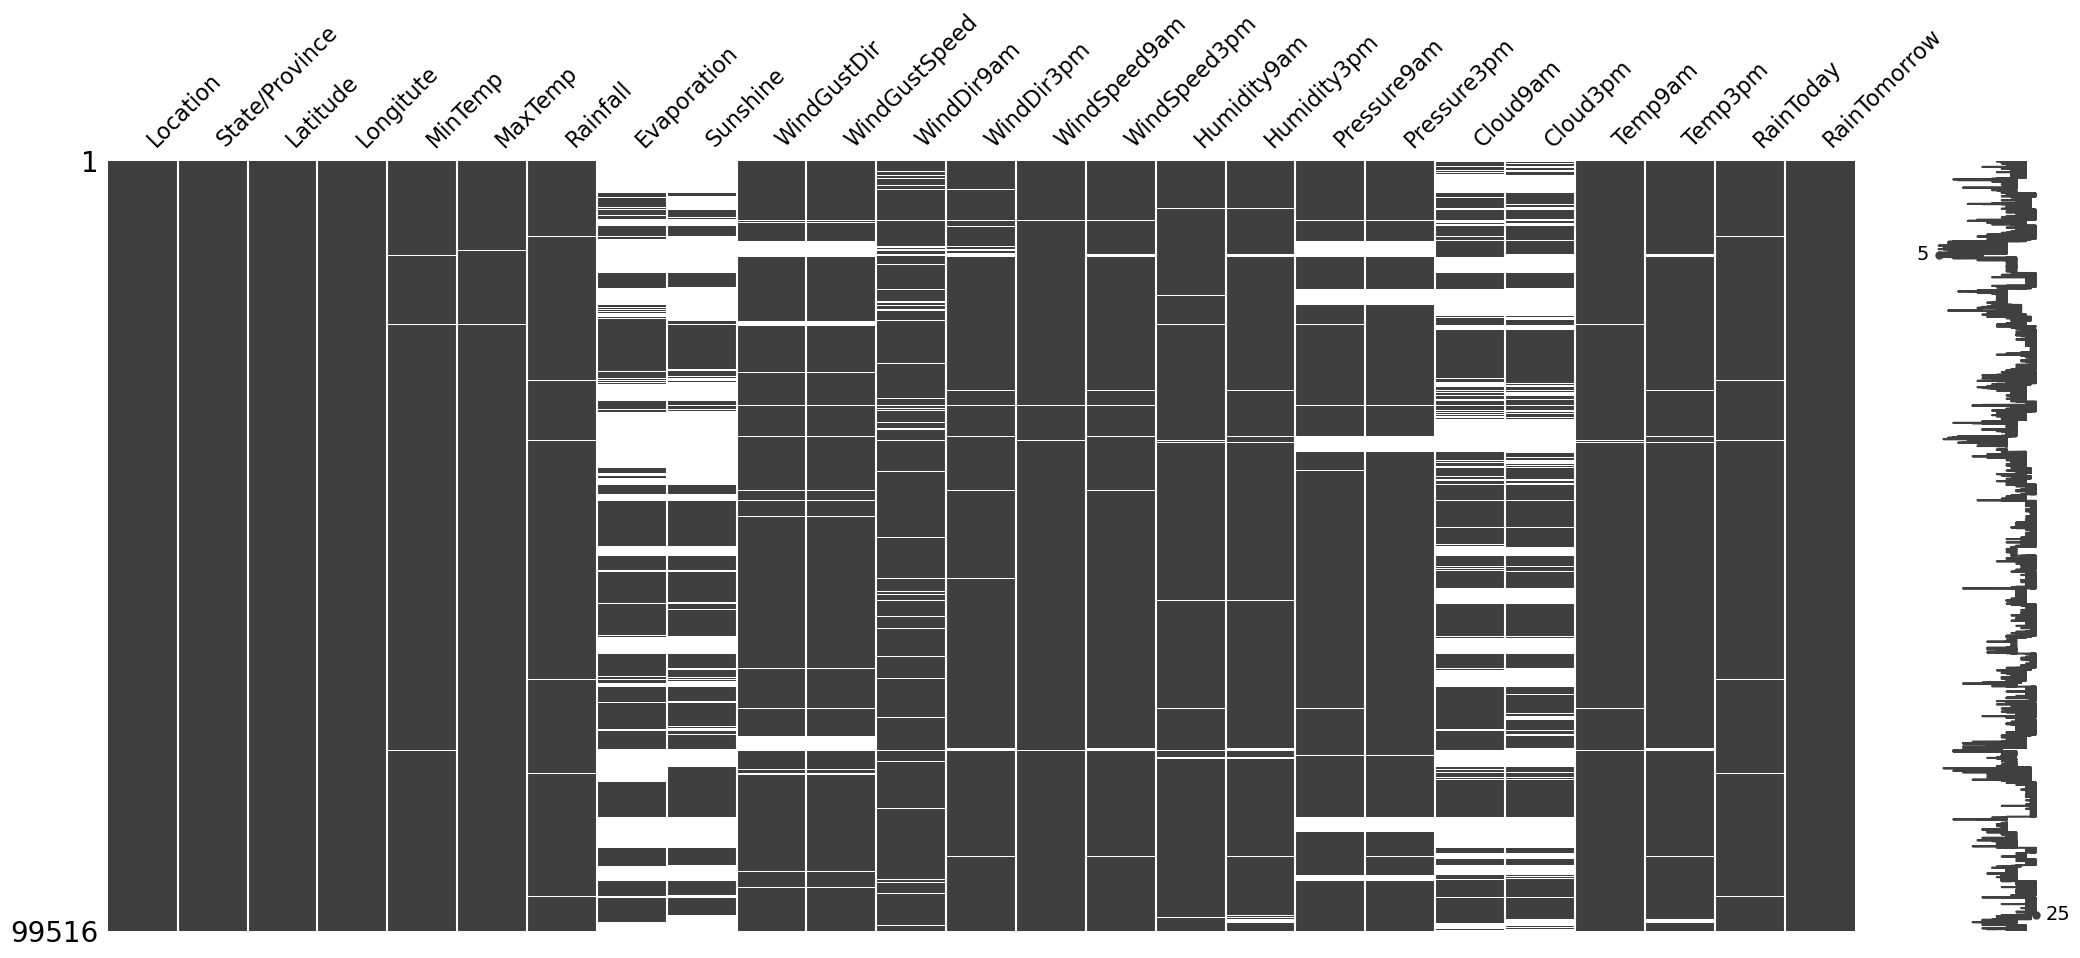

In [10]:
#The code below will display a heatmap where missing values are represented as white vertical bars in the corresponding columns. The more missing values there are in a column, the wider the white bar will be.
#he missingno matrix plot consists of two parts:
#The main part: This is the heatmap that displays the missing data pattern for each variable (column). 
#The rightmost column: This column represents the completeness of each row in the dataset. Each row in the dataframe corresponds to an observation, and the number in this column indicates the count of non-missing values in that row.
msno.matrix(weather_data)
plt.show()

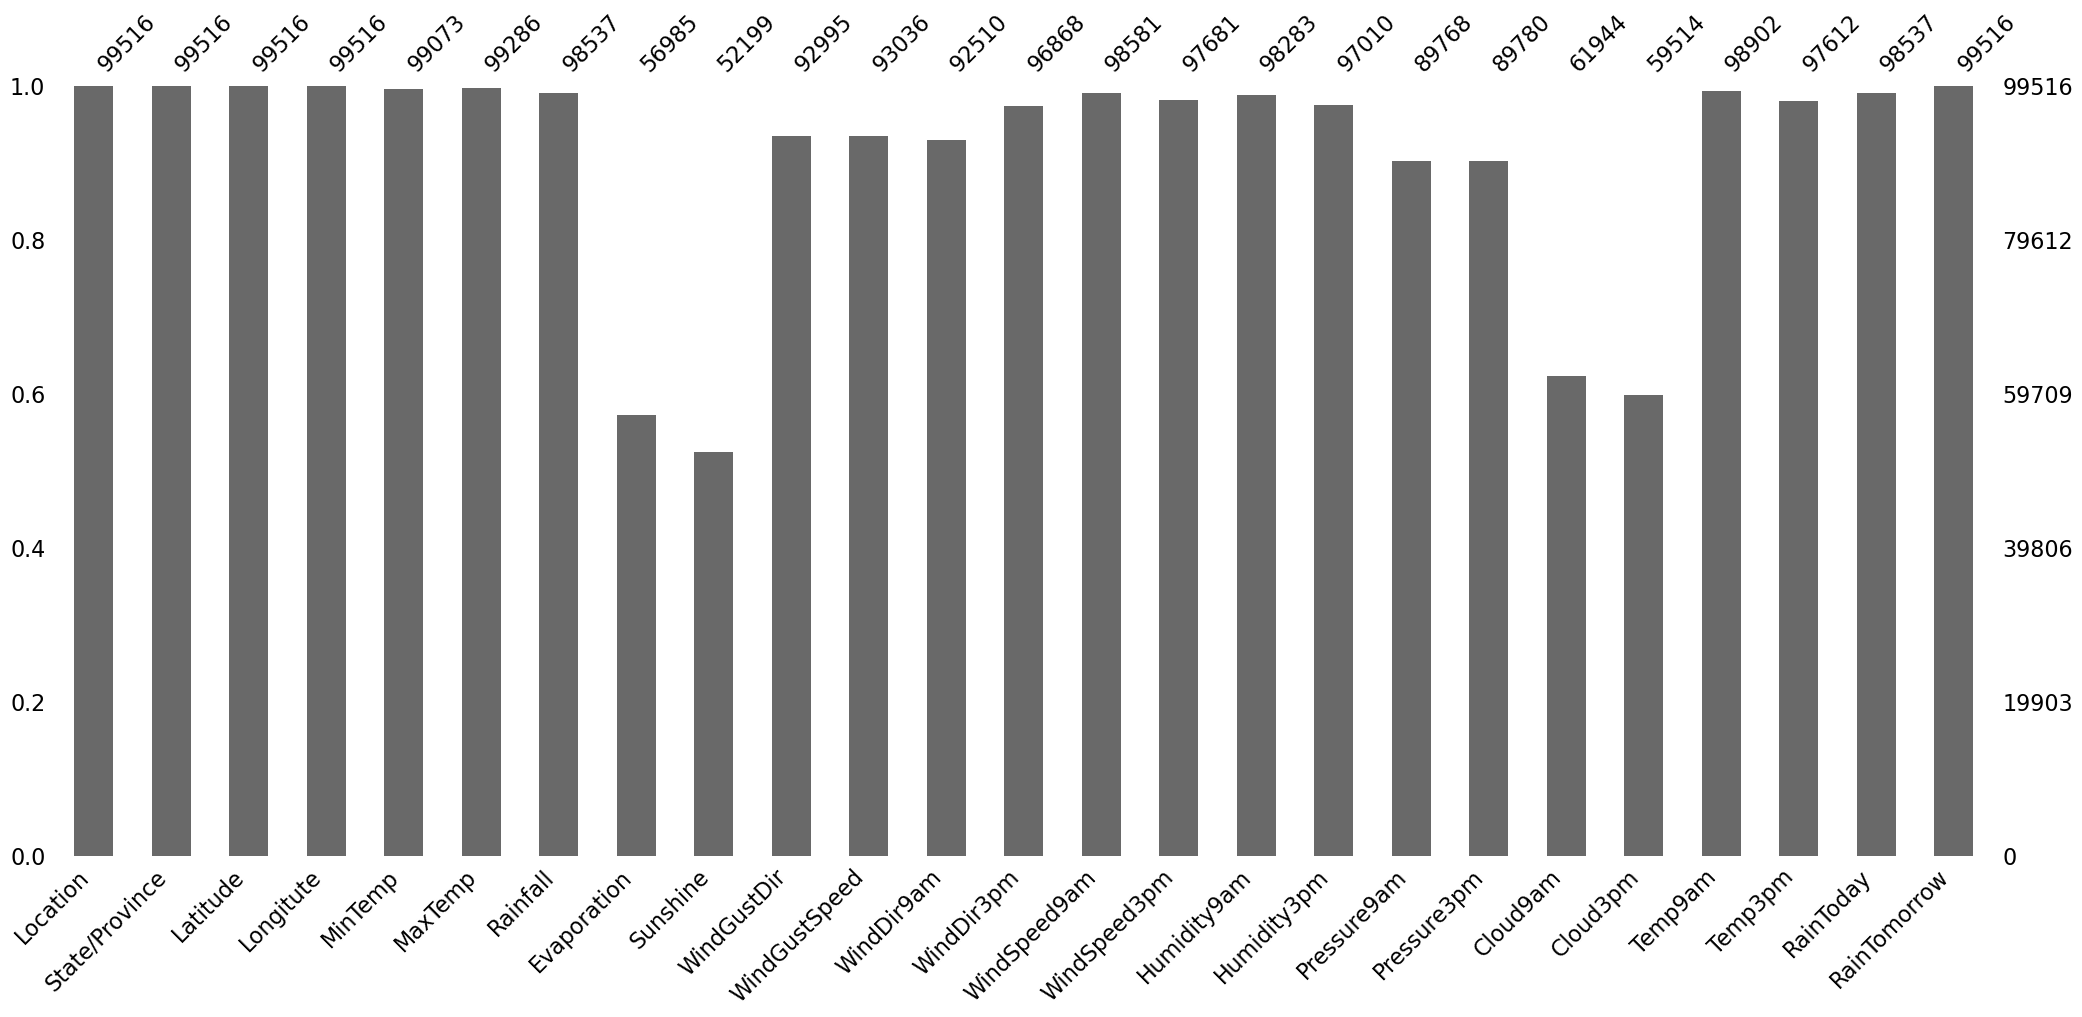

In [11]:
msno.bar(weather_data)
plt.show()

<Axes: >

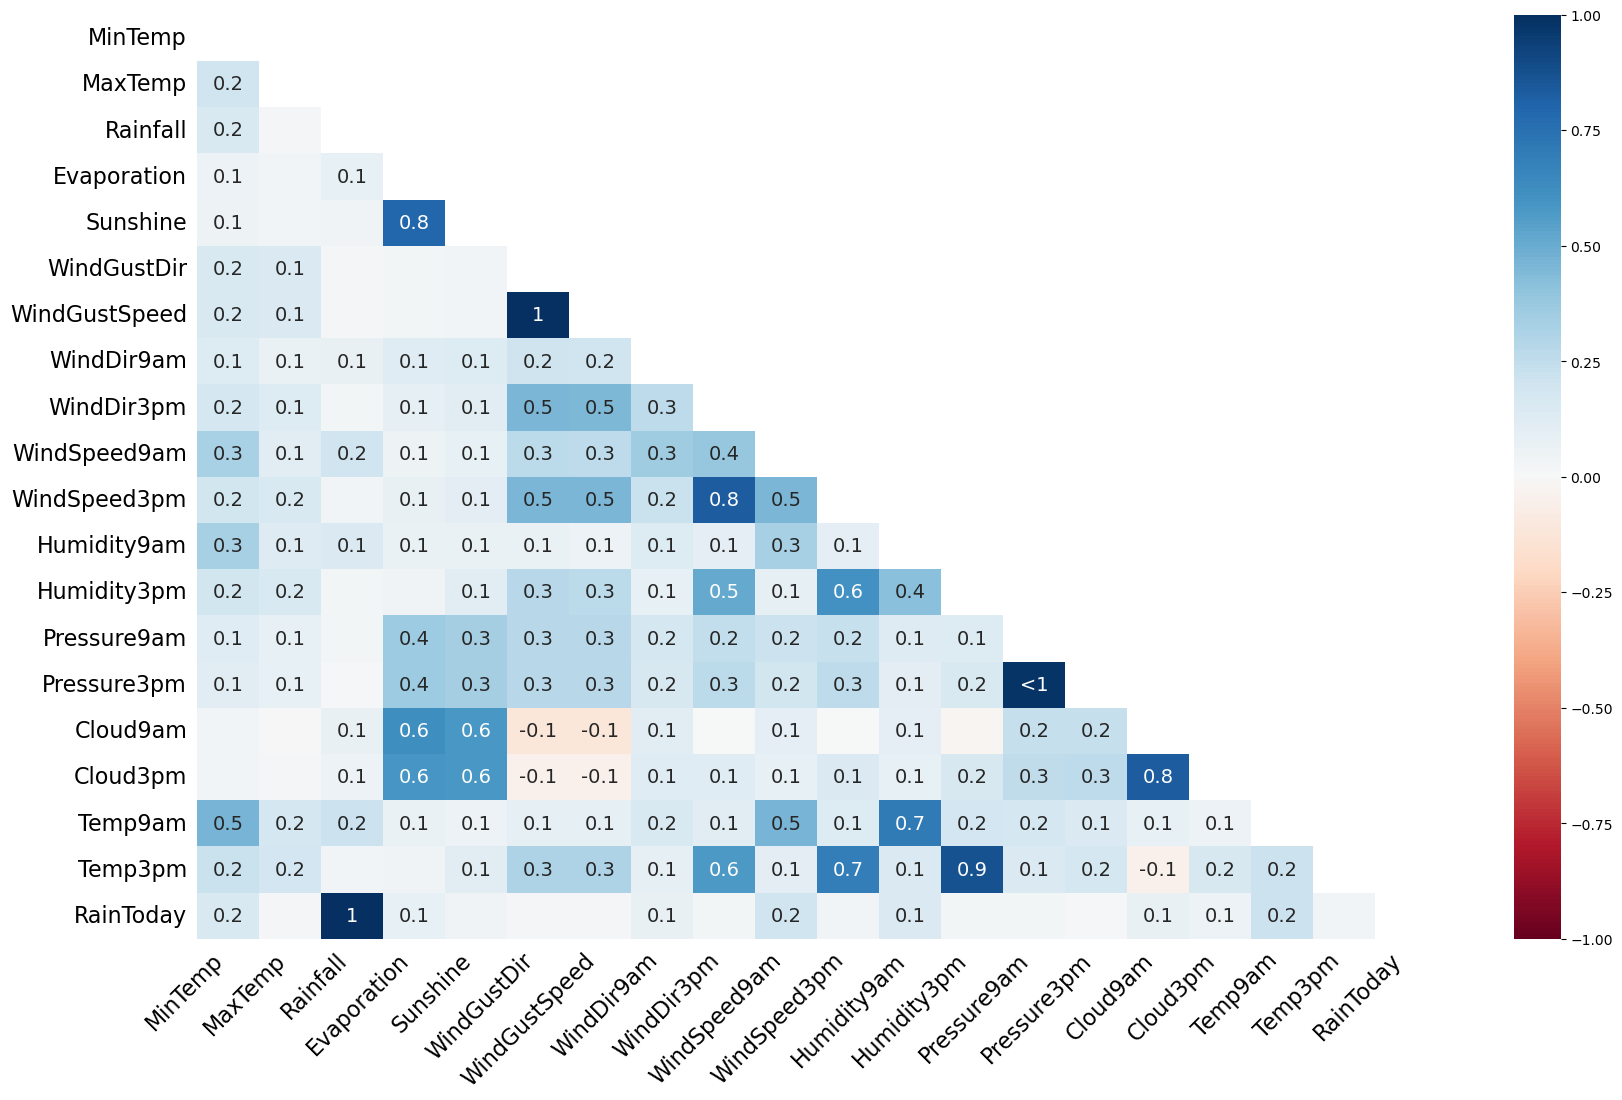

In [12]:
#missing data correlation
#if there are high correlations between missing values in different variables, it suggests a pattern in the missing data.
msno.heatmap(weather_data)

**MCAR - Missing Completely At Random** -  **missingless of data is unrelated to any observed/unobserved variables**:

    1. Data Entry Errors: In a large dataset, missing values may occur randomly due to data entry errors, such as typos or accidental omissions. For example, a survey respondent might forget to answer a question or an operator may fail to record a data point.

    2. Technical Issues: Missing data can occur randomly due to technical issues during data collection or recording. For instance, a sensor malfunction in an IoT device may lead to missing data points.

    3. Survey Non-Response: In surveys, some respondents may choose not to answer certain questions, either intentionally or unintentionally. If the decision to skip a question is unrelated to the respondent's characteristics or the question itself, it can be considered MCAR

**MAR - Missing At Random - occurs when the probability of **missing data is related to the observed variables** in the dataset but not to the unobserved (missing) data itself:**

    1. Education Level and Salary: Suppose there is a survey conducted to collect data on individuals' education level and salary. However, individuals with higher education levels are more likely to withhold their salary information due to privacy concerns or other reasons. In this case, the missingness of salary data is related to the observed variable "education level" (higher education level is associated with missing salary data). The missingness is not entirely random but depends on the observed variable (education level).   
        
**MNAR - Missing Not At Random** - occurs when the probability of **missing data is related to the unobserved (missing) data itself**, even after considering the observed variables:

    1.Income Data: In a survey about income, high-income individuals might be less likely to disclose their exact income, leading to missing data for high-income respondents.
        
    2.Health Surveys: In a health survey, participants might be more likely to skip questions about sensitive health issues, such as mental health or substance abuse, leading to missing data for those questions. 

    3.Job Satisfaction: In a survey about job satisfaction, employees who are extremely dissatisfied with their jobs might be less likely to respond truthfully about their level of satisfaction.

    4.Drug Usage Data: In a study on drug usage, individuals who use illegal drugs might be less likely to report their drug usage accurately due to for example fear of legal consequences

## Dealing with missing values
Common strategies: 

    1. remove rows/columns with NaNs - however this can lead to a loss of valuable information
    2. use statistical methods - for time-series data -> interpolation,extrapolation
    3. instead of filling in missing values, we can create an additional binary column to indicate whether a value is missing or not
    4. Imputation - replace missing values with estimated/predicted values

There are several methods to fill gaps in a categorical variable:

1. Mode Imputation: Replace the missing values with the most frequent category (mode) in the variable. 

2. Random Imputation: Replace the missing values with random samples from the distribution of the existing categories in the variable. 

3. Backward Fill (bfill) and Forward Fill (ffill): Fill the missing values with the previous (bfill) or next (ffill) non-missing value in the variable - when the data follows a temporal or sequential pattern.

4. K-Nearest Neighbors (KNN) Imputation: based on the similarity of other data points. 

5. Hot Deck Imputation: Replace missing values with values randomly selected from similar records based on certain criteria, such as matching values of other features.

6. Imputation Using Machine Learning Models like decision trees or random forests to predict the missing categories based on other features.


# Categorical variables

## <span style='color: #3F2E3E;'>Location - nominal</span>
#### <span style='color: #A78295;'>Name of the city from Australia </span>

In [13]:
weather_data['Location'].value_counts()
#Why are there the most observations from Canberra,Sydney,Perth,Hobart..? Why this kind of hirarchy? How did they get this proportions?
#Well.. Firstly, these cities are the biggest, the most populous. Secondly, I noticed that the first listed cities are located in different regions on the map. 
#We distinguish 9 states/provinces, and the first 7 cities belongs to the 7 different regions. Circumstance? 

Canberra            2393
Sydney              2361
Perth               2262
Hobart              2239
Darwin              2217
Brisbane            2202
Adelaide            2178
PerthAirport        2167
Albury              2142
MountGambier        2140
MelbourneAirport    2139
Mildura             2124
Ballarat            2122
AliceSprings        2119
Watsonia            2113
Portland            2113
Bendigo             2110
Nuriootpa           2110
Townsville          2106
Cairns              2101
SydneyAirport       2100
Tuggeranong         2099
Newcastle           2096
Sale                2093
Wollongong          2090
Cobar               2090
Launceston          2072
WaggaWagga          2068
Dartmoor            2067
CoffsHarbour        2066
Witchcliffe         2060
Richmond            2060
Penrith             2059
GoldCoast           2057
Woomera             2053
Albany              2051
BadgerysCreek       2041
NorfolkIsland       2038
SalmonGums          2031
NorahHead           2028


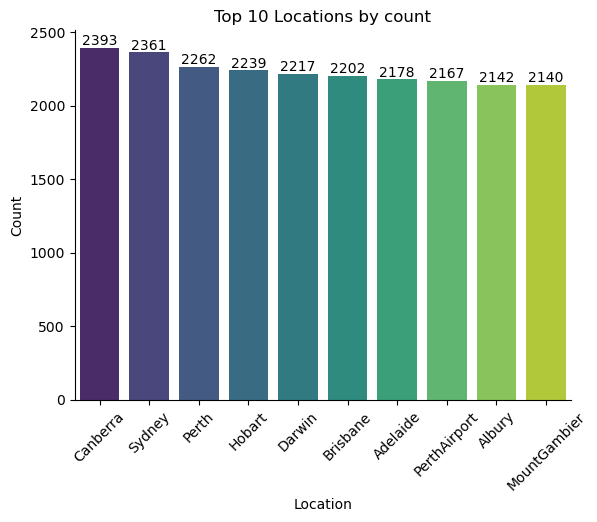

In [14]:
#type(weather_data['Location'].value_counts()) #pandas.core.series.Series
#weather_data['Location'].value_counts().index
#weather_data['Location'].value_counts().index[:10]
#weather_data['Location'].value_counts()[:10]

location_counts = weather_data['Location'].value_counts()
first_names = location_counts.index[:10]
first_counts = location_counts[:10]

sns.barplot(x=first_names, y=first_counts,palette='viridis')

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Locations by count')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

sns.despine()  # Remove the top and right spines

# Add annotations for each bar
for index, value in enumerate(first_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
# e.g.if first_counts is [10, 25, 15, 30, 20], the enumerate() function will yield the following tuples: (0, 10), (1, 25), (2, 15), (3, 30), and (4, 20).
# index: The x-coordinate at which the text will be placed
# value: The y-coordinate at which the text will be placed
# str(value): The text that will be displayed at the specified coordinates
# ha - horizontal alignment
# va - vertical alignment
plt.show()

## <span style='color: #3F2E3E;'>State/Province - nominal</span>
#### <span style='color: #A78295;'>State or province of the cities in Australia </span>

In [15]:
weather_data['State/Province'].value_counts()

 New South Wales                29037
 Victoria                       19712
 Western Australia              14513
 South Australia                 8481
 Queensland                      8466
Australian Capital Territory     6517
 Northern Territory              6441
 Tasmania                        4311
 Norfolk Island                  2038
Name: State/Province, dtype: int64

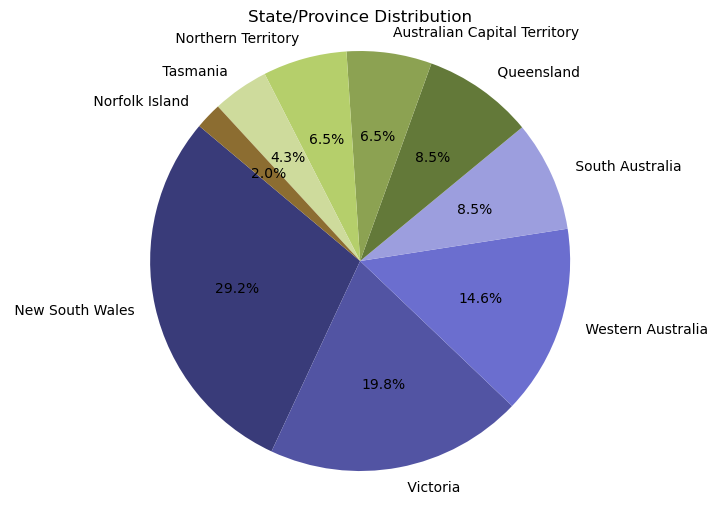

In [16]:
state_counts = weather_data['State/Province'].value_counts()

plt.figure(figsize=(8, 6))  #specifies the width and height of the figure in inches
sns.set_palette('tab20b')  

plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)

# autopct='%1.1f%%' - automatic percentage -> to display the percentage of each wedge(category)
# f - float, 1.1 - one digit after decimal point, %% - escape sequence to display % symbol
# By default, the first wedge starts from the positive x-axis (0 degrees) and proceeds counterclockwise - startangle

plt.title('State/Province Distribution')

plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

## <span style='color: #3F2E3E;'>WindGustDir - nominal</span>
#### <span style='color: #A78295;'>The direction of the strongest gust during a particular day. (16 compass points)</span>

In [17]:
pd.set_option('display.max_rows', None)
weather_data[weather_data['WindGustDir'].isnull()].head(100)
#In rows with missing WindGustDirection there are also NaN values in other variables
#NaN values in WindGustDir represent 6.6% of total number of rows, this is not so much, so that I decided to remove rows 
#with missing values in WindGustDir

,Location,State/Province,Latitude,Longitute,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
43,Albury,New South Wales,-36.0737,146.9135,21.7,36.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0,53.0,26.0,1008.8,1004.7,NaN,NaN,25.5,35.2,No,0
331,Albury,New South Wales,-36.0737,146.9135,15.1,NaN,0.0,NaN,NaN,NaN,NaN,SE,S,7.0,11.0,70.0,35.0,1014.2,1009.8,NaN,NaN,20.1,28.6,No,0
769,Albury,New South Wales,-36.0737,146.9135,10.8,26.0,0.0,NaN,NaN,NaN,NaN,SE,NaN,19.0,NaN,44.0,NaN,1024.5,NaN,NaN,NaN,17.2,NaN,No,1
770,Albury,New South Wales,-36.0737,146.9135,15.0,25.0,44.0,NaN,NaN,NaN,NaN,NE,NaN,13.0,NaN,83.0,NaN,1006.2,NaN,3.0,NaN,20.0,NaN,Yes,1
771,Albury,New South Wales,-36.0737,146.9135,15.0,27.0,14.0,NaN,NaN,NaN,NaN,W,NaN,15.0,NaN,76.0,NaN,1009.4,NaN,7.0,NaN,16.6,NaN,Yes,0
989,Albury,New South Wales,-36.0737,146.9135,5.6,28.7,0.0,NaN,NaN,NaN,NaN,ENE,WNW,7.0,28.0,70.0,22.0,1019.7,1013.3,NaN,NaN,16.2,28.3,No,0
990,Albury,New South Wales,-36.0737,146.9135,11.7,13.1,NaN,NaN,NaN,NaN,NaN,SSW,WSW,9.0,17.0,97.0,100.0,1016.8,1011.6,NaN,8.0,12.0,12.4,NaN,1
1436,Albury,New South Wales,-36.0737,146.9135,4.9,22.8,NaN,NaN,NaN,NaN,NaN,SE,ESE,4.0,9.0,80.0,38.0,1020.9,1017.1,NaN,NaN,10.7,21.9,NaN,0
2440,BadgerysCreek,New South Wales,-33.8775,150.7378,14.3,30.7,0.0,NaN,NaN,NaN,NaN,SW,NaN,7.0,NaN,83.0,NaN,1020.7,NaN,NaN,NaN,18.8,NaN,No,0
2443,BadgerysCreek,New South Wales,-33.8775,150.7378,19.1,24.3,0.8,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,91.0,NaN,1017.5,NaN,NaN,NaN,21.2,NaN,No,1


In [18]:
weather_data_cleaned_gust_dir = weather_data.copy()
weather_data_cleaned_gust_dir = weather_data_cleaned_gust_dir.dropna(subset=['WindGustDir'])
NA_data_cleaned_gust_dir = weather_data_cleaned_gust_dir.isnull().sum()
NA_data_cleaned_gust_dir

Location              0
State/Province        0
Latitude              0
Longitute             0
MinTemp             151
MaxTemp              39
Rainfall            858
Evaporation       39385
Sunshine          43824
WindGustDir           0
WindGustSpeed         0
WindDir9am         5265
WindDir3pm          668
WindSpeed9am        234
WindSpeed3pm        190
Humidity9am         969
Humidity3pm        1286
Pressure9am        7093
Pressure3pm        7069
Cloud9am          36533
Cloud3pm          37992
Temp9am             403
Temp3pm             731
RainToday           858
RainTomorrow          0
dtype: int64

In [19]:
#we removed the following number of missing observations:
NA_data - NA_data_cleaned_gust_dir

Location             0
State/Province       0
Latitude             0
Longitute            0
MinTemp            292
MaxTemp            191
Rainfall           121
Evaporation       3146
Sunshine          3493
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        1741
WindDir3pm        1980
WindSpeed9am       701
WindSpeed3pm      1645
Humidity9am        264
Humidity3pm       1220
Pressure9am       2655
Pressure3pm       2667
Cloud9am          1039
Cloud3pm          2010
Temp9am            211
Temp3pm           1173
RainToday          121
RainTomorrow         0
dtype: int64

In [20]:
weather_data_cleaned_gust_dir['WindGustDir'].value_counts()

W      6843
SE     6475
E      6341
SSE    6329
N      6323
SW     6233
S      6228
WSW    6164
SSW    6023
WNW    5664
NW     5599
ENE    5558
ESE    5101
NE     4956
NNW    4589
NNE    4569
Name: WindGustDir, dtype: int64

In [21]:
custom_order = ['N','NNE','NE','ENE','E','ESE','SE','SSE','S','SSW','SW','WSW','W','WNW','NW','NNW']
reversed_custom_order = custom_order[::-1]
wind_gust_dir = weather_data_cleaned_gust_dir['WindGustDir'].value_counts().reindex(reversed_custom_order)
wind_gust_dir

NNW    4589
NW     5599
WNW    5664
W      6843
WSW    6164
SW     6233
SSW    6023
S      6228
SSE    6329
SE     6475
ESE    5101
E      6341
ENE    5558
NE     4956
NNE    4569
N      6323
Name: WindGustDir, dtype: int64

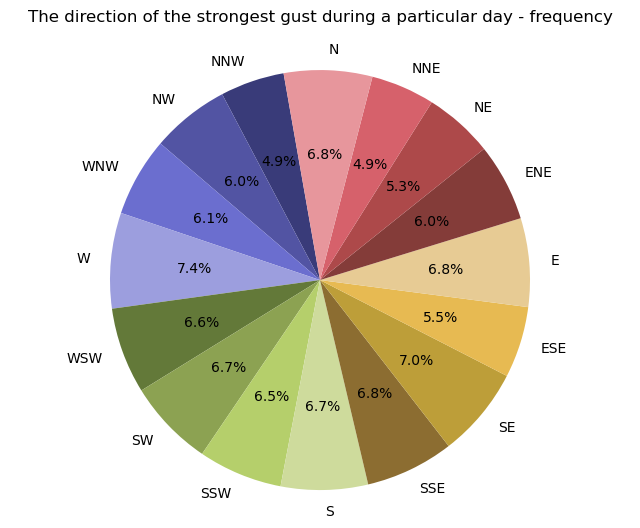

In [22]:
plt.figure(figsize=(8, 6))  #specifies the width and height of the figure in inches
sns.set_palette('tab20b')  

plt.pie(wind_gust_dir, labels=wind_gust_dir.index, autopct='%1.1f%%', startangle=100)

plt.title('The direction of the strongest gust during a particular day - frequency',pad=20) # pad=20 to make space between the title and the pie chart

plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

## <span style='color: #3F2E3E;'>WindDir9am / WindDir3pm - nominal</span>
#### <span style='color: #A78295;'>The direction of the wind for 10 min prior to 9 am. / 3pm. (compass points)</span>

In [23]:
# After removing NaN rows in WindGustDir, there is NaNs rows in: 
# WindDir9am         5265
# WindDir3pm          668
weather_data_cleaned_gust_dir.dropna(subset=['WindDir9am']).isnull().sum()
#I want to check if I remove missing values from WindDir9am, the missing values from WindDir3pm will disappear too. But only around 200 records contained NANs in both variables.  

Location              0
State/Province        0
Latitude              0
Longitute             0
MinTemp              93
MaxTemp              34
Rainfall            663
Evaporation       36194
Sunshine          40221
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm          467
WindSpeed9am          0
WindSpeed3pm        141
Humidity9am         721
Humidity3pm        1172
Pressure9am        6437
Pressure3pm        6466
Cloud9am          33114
Cloud3pm          34546
Temp9am             241
Temp3pm             672
RainToday           663
RainTomorrow          0
dtype: int64

In [24]:
NA_percentage = round(NA_data_cleaned_gust_dir / weather_data_cleaned_gust_dir.shape[0] *100,1)
print("Percentage of missing values in each column: \n{}".format(NA_percentage))

Percentage of missing values in each column: 
Location           0.0
State/Province     0.0
Latitude           0.0
Longitute          0.0
MinTemp            0.2
MaxTemp            0.0
Rainfall           0.9
Evaporation       42.4
Sunshine          47.1
WindGustDir        0.0
WindGustSpeed      0.0
WindDir9am         5.7
WindDir3pm         0.7
WindSpeed9am       0.3
WindSpeed3pm       0.2
Humidity9am        1.0
Humidity3pm        1.4
Pressure9am        7.6
Pressure3pm        7.6
Cloud9am          39.3
Cloud3pm          40.9
Temp9am            0.4
Temp3pm            0.8
RainToday          0.9
RainTomorrow       0.0
dtype: float64


In [25]:
weather_data_dir = weather_data_cleaned_gust_dir.copy()

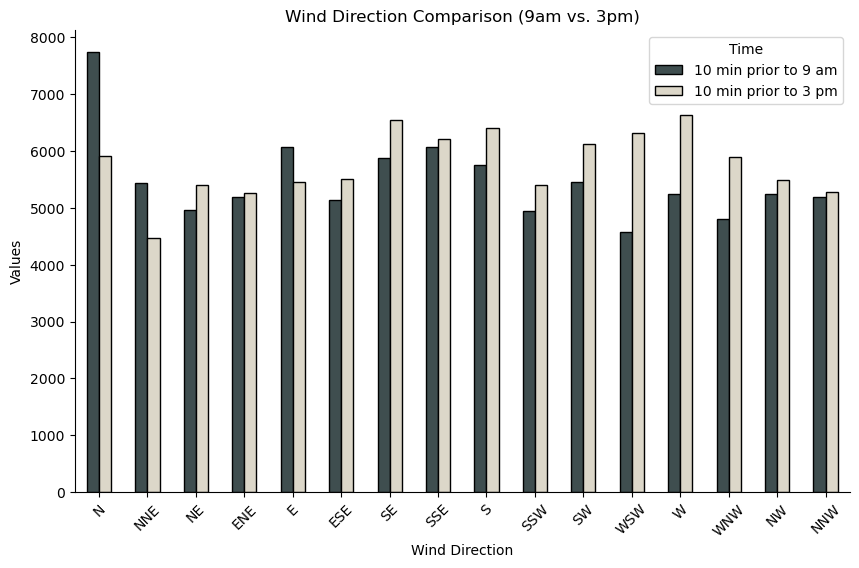

In [26]:
# Before filling null values
wind_dir_9am = weather_data_dir['WindDir9am'].value_counts().reindex(custom_order)
wind_dir_3pm = weather_data_dir['WindDir3pm'].value_counts().reindex(custom_order)
wind_dir = pd.DataFrame({'Direction': custom_order,'10 min prior to 9 am': wind_dir_9am.values, '10 min prior to 3 pm':wind_dir_3pm.values})
wind_dir.set_index('Direction', inplace=True)
ax = wind_dir.plot(kind='bar', figsize=(10, 6), width=0.5,color=['#3F4E4F', '#DCD7C9'], edgecolor='black')
ax.set_ylabel('Values')
ax.set_xlabel('Wind Direction')
ax.set_title('Wind Direction Comparison (9am vs. 3pm)')
plt.legend(title='Time', fontsize=10)
plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

In [27]:
# After filling null values

In [28]:
#A convenient solution in this case may be to replace NaNs with the most frequent category (mode) since we have only few missing values
#type(weather_data_cleaned['WindDir9am'].mode()) pandas.core.series.Series
weather_data_dir_with_mode = weather_data_dir.copy()
mode_winddir9am = weather_data_dir_with_mode['WindDir9am'].mode().iloc[0]
mode_winddir3pm = weather_data_dir_with_mode['WindDir3pm'].mode().iloc[0]
print(f"The mode in WindDri9am is: {mode_winddir9am}, while in WindDir3pm: {mode_winddir3pm}")

The mode in WindDri9am is: N, while in WindDir3pm: W


In [29]:
weather_data_dir_with_mode['WindDir9am'] = weather_data_dir_with_mode['WindDir9am'].fillna(mode_winddir9am)
weather_data_dir_with_mode['WindDir3pm'] = weather_data_dir_with_mode['WindDir3pm'].fillna(mode_winddir3pm)

In [30]:
weather_data_dir_with_mode.isnull().sum()

Location              0
State/Province        0
Latitude              0
Longitute             0
MinTemp             151
MaxTemp              39
Rainfall            858
Evaporation       39385
Sunshine          43824
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am        234
WindSpeed3pm        190
Humidity9am         969
Humidity3pm        1286
Pressure9am        7093
Pressure3pm        7069
Cloud9am          36533
Cloud3pm          37992
Temp9am             403
Temp3pm             731
RainToday           858
RainTomorrow          0
dtype: int64

In [31]:
wind_dir_9am = weather_data_dir_with_mode['WindDir9am'].value_counts().reindex(custom_order)
wind_dir_3pm = weather_data_dir_with_mode['WindDir3pm'].value_counts().reindex(custom_order)

In [32]:
#doubled_custom_order = [dir for dir in custom_order for _ in range(2)]

In [33]:
wind_dir = pd.DataFrame({'Direction': custom_order,'10 min prior to 9 am': wind_dir_9am.values, '10 min prior to 3 pm':wind_dir_3pm.values})
wind_dir

,Direction,10 min prior to 9 am,10 min prior to 3 pm
0,N,13009,5911
1,NNE,5432,4477
2,NE,4965,5402
3,ENE,5193,5257
4,E,6081,5451
5,ESE,5143,5504
6,SE,5876,6547
7,SSE,6068,6208
8,S,5753,6413
9,SSW,4948,5400


In [34]:
wind_dir.set_index('Direction', inplace=True)
wind_dir

,10 min prior to 9 am,10 min prior to 3 pm
Direction,,
N,13009,5911
NNE,5432,4477
NE,4965,5402
ENE,5193,5257
E,6081,5451
ESE,5143,5504
SE,5876,6547
SSE,6068,6208
S,5753,6413


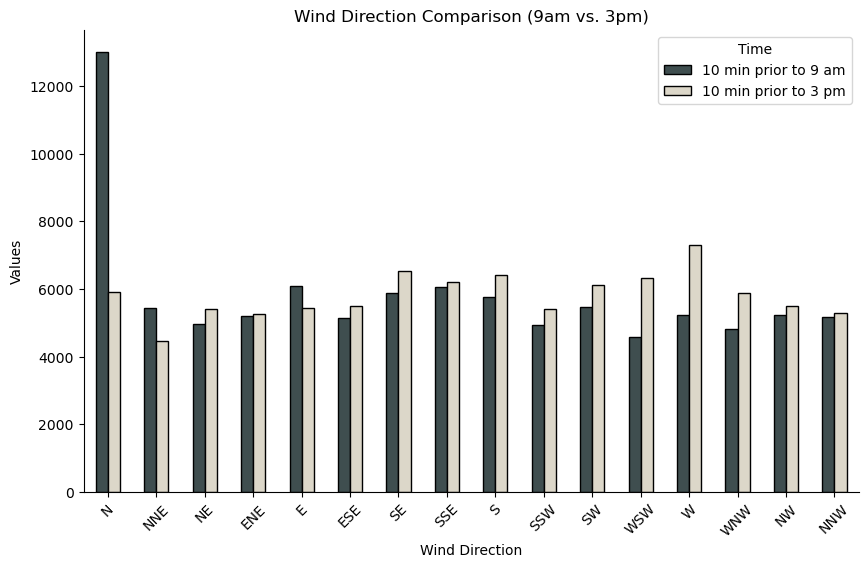

In [35]:
# Plot the grouped barplot
ax = wind_dir.plot(kind='bar', figsize=(10, 6), width=0.5,color=['#3F4E4F', '#DCD7C9'], edgecolor='black')
ax.set_ylabel('Values')
ax.set_xlabel('Wind Direction')
ax.set_title('Wind Direction Comparison (9am vs. 3pm)')
plt.legend(title='Time', fontsize=10)
plt.xticks(rotation=45)
#plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

## <span style='color: #3F2E3E;'>Cloud9am / Cloud3pm - ordinal</span>
#### <span style='color: #A78295;'>Cloud-obscured portions of the sky at 9 am. / 3pm.(scale in oktas - eighths)</span>

In meteorology, cloud cover is often measured in "oktas." An okta is a unit of measurement used to estimate the fraction of the sky covered by clouds at any given time. It is divided into 8 equal parts, with each okta representing 1/8th of the sky covered by clouds.However, we can distinguish also 0 oktas and 9 oktas. 

Here's how cloud cover is typically described in terms of oktas:

0 oktas: Completely clear sky, no clouds.

1 okta: Very few clouds, almost clear sky.

2 oktas: Partly cloudy, 25% of the sky covered by clouds.

3 oktas: Mostly cloudy.

4 oktas: More clouds, about half of the sky covered.

5 oktas: Overcast sky.

6 oktas: Cloudy, with about 75% of the sky covered by clouds.

7 oktas: Mostly covered.

8 oktas: Completely overcast, the entire sky covered by clouds.

9 oktas: Sky obscured by thick clouds.


In [36]:
weather_data_clouds = weather_data_dir_with_mode.copy()
#weather_data_clouds.info()

In [37]:
weather_data_clouds[['Cloud9am','Cloud3pm']].head(20)

,Cloud9am,Cloud3pm
0,8.0,NaN
1,NaN,NaN
2,7.0,8.0
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,8.0,8.0
8,NaN,7.0
9,0.0,NaN


In [38]:
sorted(weather_data_clouds['Cloud3pm'].unique())

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

In [39]:
sorted(weather_data_clouds['Cloud9am'].unique())

[8.0, nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0]

In [40]:
weather_data_clouds[['Cloud9am','Cloud3pm']].isnull().sum() / weather_data_clouds.shape[0] * 100 

Cloud9am    39.284908
Cloud3pm    40.853809
dtype: float64

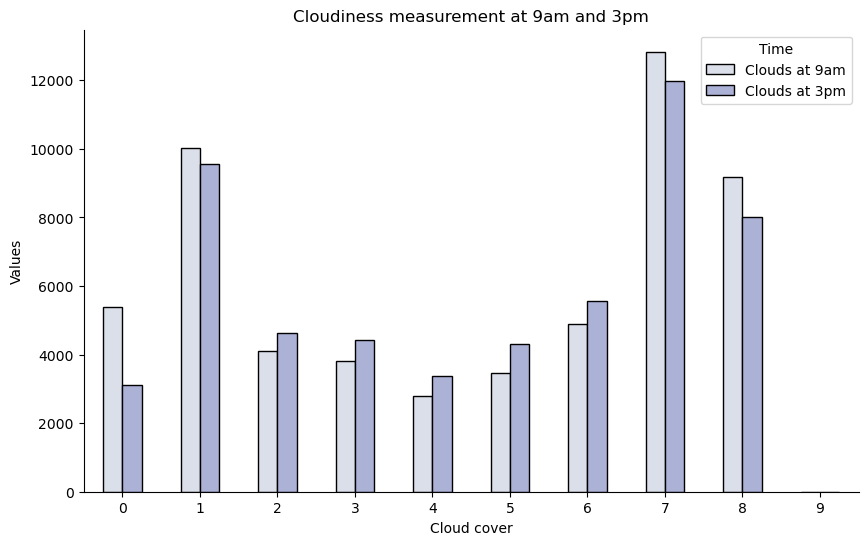

In [41]:
weather_cloud_9am = weather_data_clouds['Cloud9am'].value_counts() 
weather_cloud_3pm = weather_data_clouds['Cloud3pm'].value_counts()
weather_cloud_9am.index = weather_cloud_9am.index.astype(int)
weather_cloud_3pm.index = weather_cloud_3pm.index.astype(int)
clouds = pd.DataFrame({'Clouds at 9am': weather_cloud_9am, 'Clouds at 3pm':weather_cloud_3pm})
ax = clouds.plot(kind='bar', figsize=(10, 6), width=0.5,color=['#DBDFEA', '#ACB1D6'], edgecolor='black')
ax.set_ylabel('Values')
ax.set_xlabel('Cloud cover')
ax.set_title('Cloudiness measurement at 9am and 3pm')
plt.legend(title='Time', fontsize=10)
plt.xticks(rotation=0)
sns.despine()
plt.show()

## Random Imputation

In [42]:
# Cloud9am

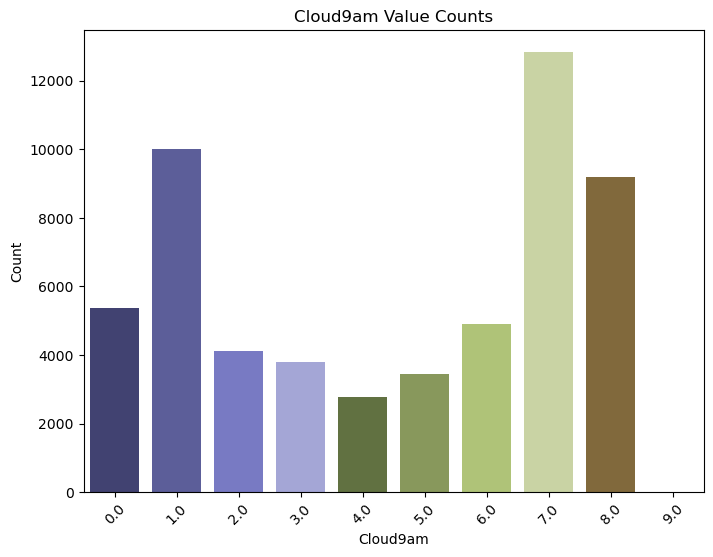

In [43]:
#Before
plt.figure(figsize=(8, 6))
sns.countplot(x='Cloud9am', data=weather_data_clouds)
plt.xlabel('Cloud9am')
plt.ylabel('Count')
plt.title('Cloud9am Value Counts')
plt.xticks(rotation=45)
plt.show()

In [44]:
# def fill_categorical_gaps(data,col):
#     if data[col].dtype == 'object':  # Check if the column is categorical
#         missing_indices = data[col].isnull()
#         non_missing_data = data.loc[~missing_indices, col]
#         probabilities = non_missing_data.value_counts(normalize=True)
#         num_missing = missing_indices.sum()
        
#         # Generate random values based on the probabilities
        
#         random_values = np.random.choice(probabilities.index, size=num_missing, p=probabilities.values)
#         data.loc[missing_indices, col] = random_values

#     return data

# fill_categorical_gaps(weather_data_clouds,'Cloud9am')

In [45]:
missing_indices = weather_data_clouds['Cloud9am'].isnull()
num_missing = missing_indices.sum()
num_missing

36533

In [46]:
non_missing_data = weather_data_clouds.loc[~missing_indices,'Cloud9am' ]
non_missing_data.head(5)

0     8.0
2     7.0
7     8.0
9     0.0
10    8.0
Name: Cloud9am, dtype: float64

In [47]:
probabilities = non_missing_data.value_counts(normalize=True) # the relative frequencies (probabilities) instead of the actual counts.
random_values = np.random.choice(probabilities.index, size=num_missing, p=probabilities.values)
weather_data_clouds.loc[missing_indices,'Cloud9am'] = random_values
weather_data_clouds['Cloud9am'].value_counts()

7.0    21031
1.0    16648
8.0    15076
0.0     8819
6.0     8058
2.0     6791
3.0     6320
5.0     5710
4.0     4541
9.0        1
Name: Cloud9am, dtype: int64

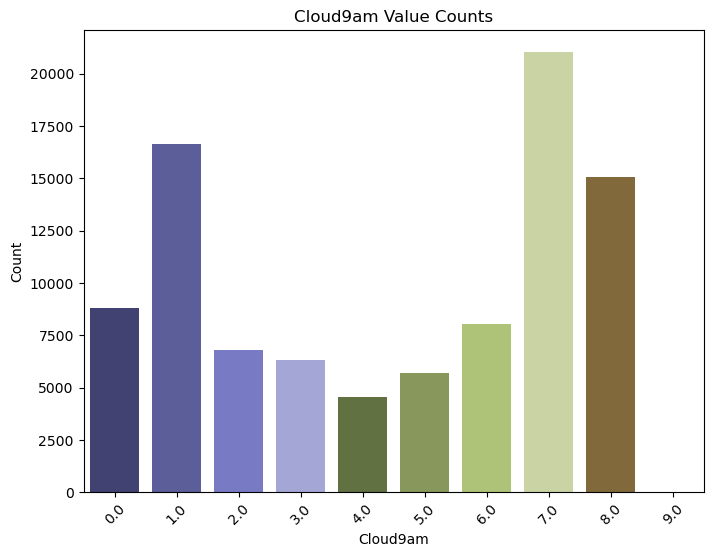

In [48]:
#After
plt.figure(figsize=(8, 6))
sns.countplot(x='Cloud9am', data=weather_data_clouds)
plt.xlabel('Cloud9am')
plt.ylabel('Count')
plt.title('Cloud9am Value Counts')
plt.xticks(rotation=45)
plt.show()

In [49]:
#Cloud 3pm

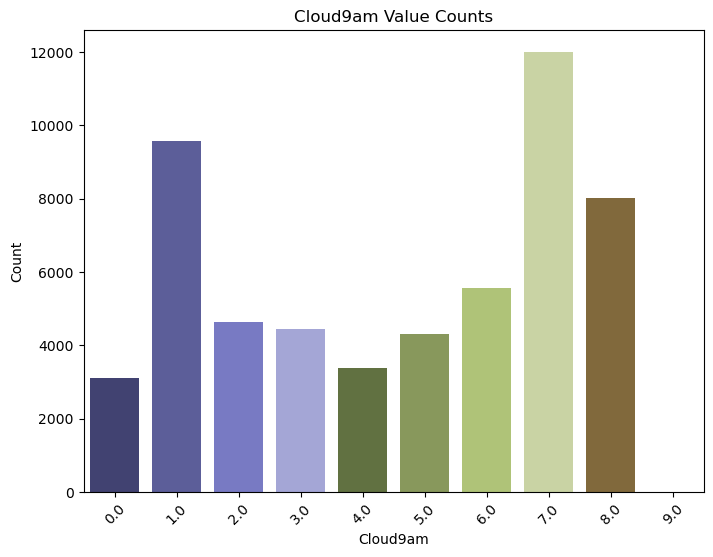

In [50]:
#Before
plt.figure(figsize=(8, 6))
sns.countplot(x='Cloud3pm', data=weather_data_clouds)
plt.xlabel('Cloud9am')
plt.ylabel('Count')
plt.title('Cloud9am Value Counts')
plt.xticks(rotation=45)
plt.show()

In [51]:
missing_indices = weather_data_clouds['Cloud3pm'].isnull()
num_missing = missing_indices.sum()
non_missing_data = weather_data_clouds.loc[~missing_indices,'Cloud3pm']

probabilities = non_missing_data.value_counts(normalize=True) # the relative frequencies (probabilities) instead of the actual counts.
random_values = np.random.choice(probabilities.index, size=num_missing, p=probabilities.values)

weather_data_clouds.loc[missing_indices,'Cloud3pm'] = random_values

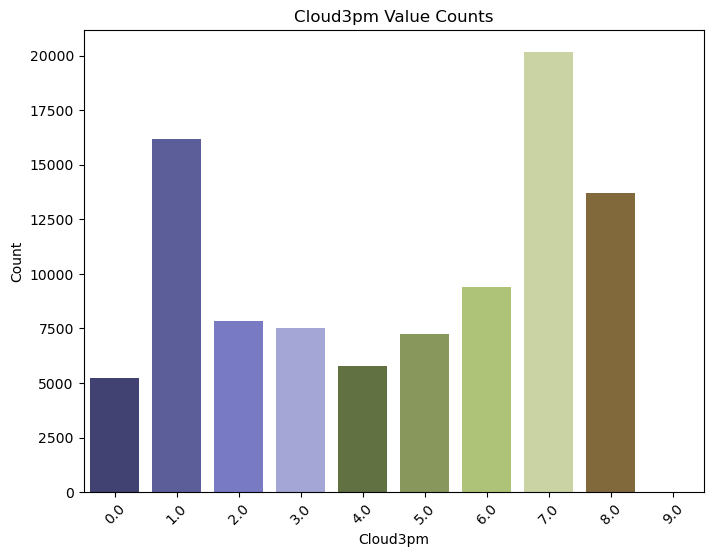

In [52]:
#After
plt.figure(figsize=(8, 6))
sns.countplot(x='Cloud3pm', data=weather_data_clouds)
plt.xlabel('Cloud3pm')
plt.ylabel('Count')
plt.title('Cloud3pm Value Counts')
plt.xticks(rotation=45)
plt.show()

In [53]:
#weather_data_clouds.isnull().sum()

#### I have tried also with other methods,namely with the mode and RandomForestClassifier but I was not satisfied with the results. 

#### Ultimately, I chose filling NaNs with random values based on the distribution of the variable.

## Filling gaps with the mode

In [54]:
# weather_data_clouds = weather_data_dir_with_mode.copy()
# clouds_9am_mode = weather_data_clouds['Cloud9am'].mode().iloc[0]
# clouds_3pm_mode = weather_data_clouds['Cloud3pm'].mode().iloc[0]

# weather_data_clouds['Cloud9am']= weather_data_clouds['Cloud9am'].fillna(clouds_9am_mode)
# weather_data_clouds['Cloud9am']= weather_data_clouds['Cloud9am'].fillna(clouds_9am_mode)

# weather_cloud_9am_with_mode = weather_data_clouds['Cloud9am'].value_counts()
# weather_cloud_3pm_with_mode = weather_data_clouds['Cloud3pm'].value_counts()

# clouds_with_mode = pd.DataFrame({'Clouds at 9am': weather_cloud_9am_with_mode, 'Clouds at 3pm':weather_cloud_3pm_with_mode})
# clouds_with_mode

# ax = clouds_with_mode.plot(kind='bar', figsize=(10, 6), width=0.5,color=['#DBDFEA', '#ACB1D6'], edgecolor='black')
# ax.set_ylabel('Values')
# ax.set_xlabel('Cloud cover')
# ax.set_title('Cloudiness measurement at 9am and 3pm \n after filling NaNs with mode')
# plt.legend(title='Time', fontsize=10)
# plt.xticks(rotation=0)
# sns.despine()
# plt.show()

# Random Forest Classifier
Random Forests are relatively resistant to null values and can handle missing data implicitly during the tree-building process.
RandomForestClassifier is a supervised learning algorithm - the model is trained on labeled data -> 
the input data (features) and their corresponding output labels (target) are provided during the training process.

Inputs (features) have to be converted to numeric - for categorical features I will use the target encoding (one-hot enocoding will cause too many classes)
Will it be good idea to combine target encoding with one-hot encoding? 

Outputs should remain categorical 

Target Leakage: "Ensure that the target encoding is calculated based only on the training set and not using any information from the validation or test sets."

Actually, from the very beginning I wanted to use RandomForestClassifier algorithm (method that consist of multiple Decision Trees), however it gave me less than 50% accuracy on test data and validation data. I tried to improve it by experimenting with: 
1) hyperparametrs like number of decision trees (n_estimators), maximum depth of trees(max_depth),minimum number of samples required to split a node (min_samples_split).
2) cross-validation 
3) class weights - it is recommended to set the class_weight parameter to "balanced" in RFC if there is class imbalance in the target variable
4) I was thinking about using one of the hyperparameter optimization techniques (e.g., grid search, random search, Bayesian optimization) to automatically search for the optimal number of trees, but for some reasons I could not run it. 
5) smoothing -> to enhence the target encoding process: to handle rare categories

I think **overfitting** is a major problem here but somehow I can't figure out the reason of it. I tried to optimalize both target encoding and RFC model and there goes something wrong. For now, I have no idea what. The code that I've tried is presented below.

In [55]:
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

data_encoded = weather_data_clouds.copy()

# Conversion into categorical types (because in fact RainTomorrow, Cloud9am/3pm are categorical)
data_encoded['RainTomorrow'] = data_encoded['RainTomorrow'].map({0: 'No', 1: 'Yes'})
cloud_categories = {
    0: 'Clear',
    1: 'Few Clouds',
    2: 'Partly Cloudy',
    3: 'Mostly Cloudy',
    4: 'Cloudy',
    5: 'Overcast',
    6: 'Obscured',
    7: 'Mostly Obscured',
    8: 'Completely Overcast',
    9: 'Sky Obscured'
}
data_encoded['Cloud3pm'] = data_encoded['Cloud3pm'].map(cloud_categories).astype('category')

# Remove all rows with NaNs + remember to reset the indexes, later their might be problematic !!
data_encoded = data_encoded.dropna(how='any')
data_encoded.reset_index(drop=True, inplace=True)

target_column = 'Cloud9am'
categorical_columns_to_encode = ['Location', 'State/Province', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Cloud3pm']

X = data_encoded.drop(['Cloud9am'], axis=1)
y = data_encoded['Cloud9am']

# Scale features/inputs - without dummies !!

X_unscaled = X.drop(columns=categorical_columns_to_encode)
scaler = StandardScaler()
scaler.fit(X_unscaled)
X_scaled = scaler.transform(X_unscaled)
X_scaled = pd.DataFrame(X_scaled,columns=X_unscaled.columns)
X = pd.concat([X_scaled, X[categorical_columns_to_encode]], axis=1)

# Split the data into train,validation,train -> proportion: 70:10:20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

# Target encoding - watch that you fit only once, later you just use transform function on different data

for col in categorical_columns_to_encode:
    te = TargetEncoder(smoothing=0.2)
    te.fit(X_train[col], y_train)
    X_train[col] = te.transform(X_train[col])
    X_test[col] = te.transform(X_test[col])
    X_val[col] = te.transform(X_val[col])
    
# RandomForestClassifier

# rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
class_weights = 'balanced'

rf_classifier = RandomForestClassifier(class_weight = class_weights,max_depth = 40, min_samples_split = 5,random_state = 5)
rf_classifier.fit(X_train, y_train)

# Evaluate the model on the training set
training_accuracy = rf_classifier.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)

validation_accuracy = rf_classifier.score(X_val, y_val)
print("Validation Accuracy:", validation_accuracy)

test_accuracy = rf_classifier.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.9969847684177805
Validation Accuracy: 0.4321148825065274
Test Accuracy: 0.43255004351610093


## Cross-validation

In [56]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the random forest classifier
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation Scores: [0.42570718 0.43394467 0.43814113 0.43036991 0.43456637]
Mean CV Accuracy: 0.4325458501709668


## Learning curve 

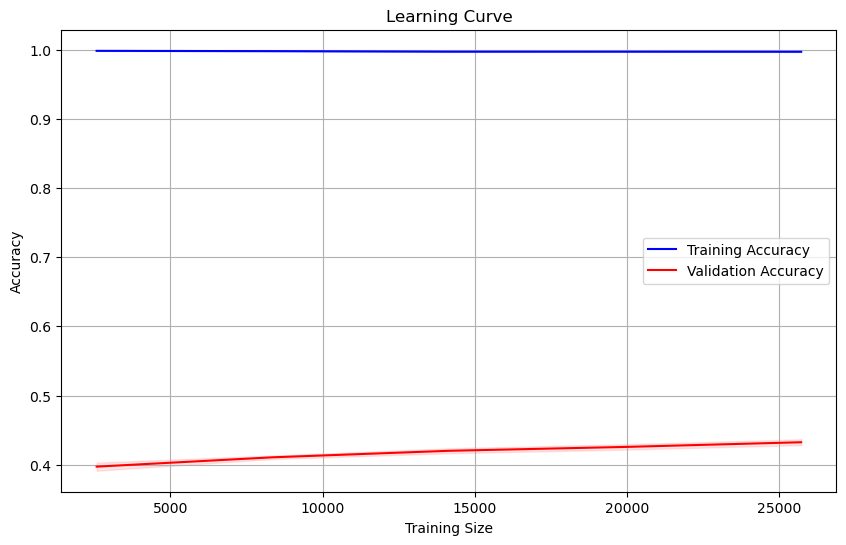

In [57]:
from sklearn.model_selection import learning_curve

# Create learning curve with the random forest classifier
train_sizes, train_scores, test_scores = learning_curve(
    rf_classifier, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.1,
    color="blue",
)
plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="red")
plt.fill_between(
    train_sizes,
    test_mean - test_std,
    test_mean + test_std,
    alpha=0.1,
    color="red",
)
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()

## Attempt to find the best hyperparameters 

In [58]:
# Define a range of values for max_depth and min_samples_split to try
#max_depth_range = [10, 20, 30, None]  # None means no maximum depth, allowing trees to grow freely
max_depth_range = [10, 20, 30, None]
min_samples_split_range = [2, 5, 10, 20]

best_validation_accuracy = 0
best_max_depth = None
best_min_samples_split = None

for max_depth in max_depth_range:
    for min_samples_split in min_samples_split_range:
        rf_classifier = RandomForestClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=5)
        rf_classifier.fit(X_train, y_train)
        validation_accuracy = rf_classifier.score(X_val, y_val)
        print(f"Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Validation Accuracy: {validation_accuracy}")

Max Depth: 10, Min Samples Split: 2, Validation Accuracy: 0.4166666666666667
Max Depth: 10, Min Samples Split: 5, Validation Accuracy: 0.417319408181027
Max Depth: 10, Min Samples Split: 10, Validation Accuracy: 0.4162315056570931
Max Depth: 10, Min Samples Split: 20, Validation Accuracy: 0.4166666666666667
Max Depth: 20, Min Samples Split: 2, Validation Accuracy: 0.43102697998259354
Max Depth: 20, Min Samples Split: 5, Validation Accuracy: 0.43276762402088775
Max Depth: 20, Min Samples Split: 10, Validation Accuracy: 0.4321148825065274
Max Depth: 20, Min Samples Split: 20, Validation Accuracy: 0.42449956483899043
Max Depth: 30, Min Samples Split: 2, Validation Accuracy: 0.4336379460400348
Max Depth: 30, Min Samples Split: 5, Validation Accuracy: 0.43059181897302
Max Depth: 30, Min Samples Split: 10, Validation Accuracy: 0.43342036553524804
Max Depth: 30, Min Samples Split: 20, Validation Accuracy: 0.4260226283724978
Max Depth: None, Min Samples Split: 2, Validation Accuracy: 0.4323324

## GridSearchCV

In [59]:
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameter grid to search
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Perform the grid search on the training set
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters and model from the grid search
# best_rf_classifier = grid_search.best_estimator_

# # Evaluate the best model on the validation set
# validation_accuracy = best_rf_classifier.score(X_val, y_val)
# print("Best Validation Accuracy:", validation_accuracy)

## Feature importances

In [60]:
rf_classifier.feature_importances_.shape

(24,)

In [61]:
X.columns

Index(['Latitude', 'Longitute', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'Location', 'State/Province',
       'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow',
       'Cloud3pm'],
      dtype='object')

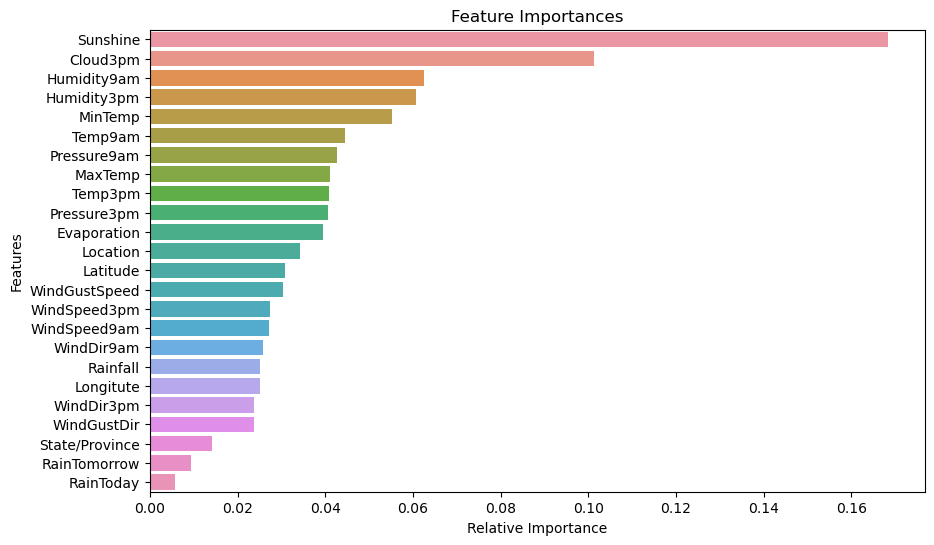

In [62]:
features = X.columns
importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(importances)[::-1] #sort indexes in descending order

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_indices], y=[features[i] for i in sorted_indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

## Confusion matrix

A confusion matrix typically has four main components:

True Positive (TP): The number of instances that are correctly predicted as positive by the model.

False Positive (FP): The number of instances that are incorrectly predicted as positive by the model when they are actually negative.

True Negative (TN): The number of instances that are correctly predicted as negative by the model.

False Negative (FN): The number of instances that are incorrectly predicted as negative by the model when they are actually positive.

In [63]:
confusion_matrix = pd.DataFrame({'Actual Positive': ['TP', 'FN'], 'Actual Negative': ['FP', 'TN']}, index=['Predicted Positive', 'Predicted Negative'])

print(confusion_matrix)

                   Actual Positive Actual Negative
Predicted Positive              TP              FP
Predicted Negative              FN              TN


In [64]:
from sklearn.metrics import confusion_matrix
y_pred = rf_classifier.predict(X_test)
confusion_matrix(y_test,y_pred)
# It shows how many values are correct classified (those value are in the diagonal)

array([[ 397,  381,    3,    0,    0,    0,    1,   80,   10],
       [ 162, 1153,   15,   19,    3,    0,   10,  280,   28],
       [  30,  383,   23,   35,    5,    0,   12,  225,   10],
       [  19,  319,   18,   35,    2,    3,   15,  244,   13],
       [  12,  180,   11,   16,    7,    5,    5,  191,   16],
       [  13,  194,   13,   21,    3,    3,   17,  306,   30],
       [   9,  190,    7,   13,    3,    4,   21,  585,   33],
       [   8,  192,    8,    8,    3,    1,   12, 1931,  163],
       [   1,   52,    0,    1,    1,    1,    0,  506,  463]],
      dtype=int64)

## Classification_report
Precision: The ability of the model to correctly identify instances of a given class. It is the ratio of true positive predictions to the total predicted positive instances.

Recall: The ability of the model to correctly identify all instances of a given class. It is the ratio of true positive predictions to the total actual positive instances.

F1-score: The harmonic mean of precision and recall, providing a balanced measure between precision and recall.

Support: The number of samples in each class.

Accuracy: The overall accuracy of the model, which is the ratio of correct predictions to the total number of samples.

Macro avg: The average of the metrics (precision, recall, F1-score) for all classes. It gives equal importance to each class.

Weighted avg: The weighted average of the metrics, taking into account the support (number of samples) for each class.

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.46      0.61      0.52       651
         1.0       0.69      0.38      0.49      3044
         2.0       0.03      0.23      0.06        98
         3.0       0.05      0.24      0.09       148
         4.0       0.02      0.26      0.03        27
         5.0       0.01      0.18      0.01        17
         6.0       0.02      0.23      0.04        93
         7.0       0.83      0.44      0.58      4348
         8.0       0.45      0.60      0.52       766

    accuracy                           0.44      9192
   macro avg       0.28      0.35      0.26      9192
weighted avg       0.69      0.44      0.52      9192



## <span style='color: #3F2E3E;'>RainToday - nominal</span>
#### <span style='color: #A78295;'>If today is rainy then ‘Yes’. If today is not rainy then ‘No’.</span>

In [66]:
# Checkpoint
weather_data_after_clouds = weather_data_clouds.copy()
weather_data_after_clouds['RainToday'].head(5)
weather_data_after_clouds['RainToday'].value_counts() #does not contain NaNs

No     71765
Yes    20372
Name: RainToday, dtype: int64

In [67]:
weather_data_after_clouds['RainToday'].isnull().sum()/weather_data_after_clouds.shape[0]

0.009226302489381149

In [68]:
#I'm going to remove all missing values, because they constitute only ~ 0.009%
weather_data_after_clouds = weather_data_after_clouds[weather_data_after_clouds['RainToday'].notnull()]
# 2nd way 
# weather_data_after_clouds= weather_data_after_clouds.dropna(subset=['RainToday'])
weather_data_after_clouds['RainToday'].isnull().sum()

0

In [69]:
weather_data_after_clouds.shape

(92137, 25)

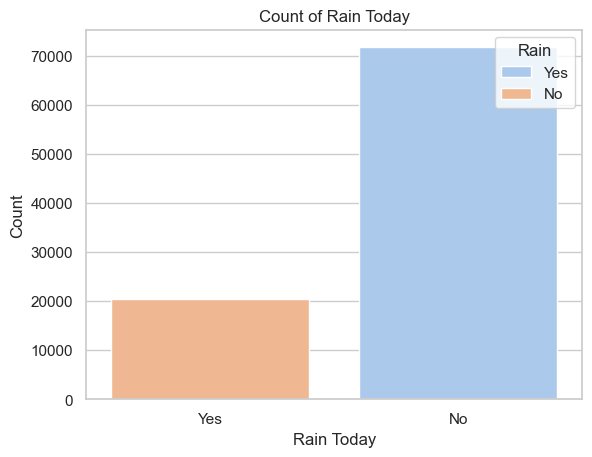

<Figure size 600x400 with 0 Axes>

In [70]:
sns.set(style="whitegrid", palette="pastel")

sns.countplot(x='RainToday', data=weather_data_after_clouds, hue='RainToday',  order=['Yes', 'No'],dodge=False)

plt.xlabel('Rain Today')
plt.ylabel('Count')
plt.title('Count of Rain Today')

plt.legend(title='Rain', loc='upper right', labels=['Yes', 'No'])

# Adjust figure size for better visualization
plt.figure(figsize=(6, 4))

plt.show()

In [71]:
# weather_data_after_clouds['RainToday'] = weather_data_after_clouds['RainToday'].map({'Yes':1,'No':0}) 
# weather_data_after_clouds.head(10)

In [72]:
weather_data_rain = weather_data_after_clouds.copy()

<h3 style='text-align: center;'> OUR MAIN PURPOSE </h3>

## <span style='color: #3F2E3E;'>RainTomorrow - nominal</span>
#### <span style='color: #A78295;'>If tomorrow is rainy then 1. If tomorrow is not rainy then 0 </span>

In [73]:
weather_data_rain['RainTomorrow'].head(5)
weather_data_rain['RainTomorrow'].value_counts()

0    71911
1    20226
Name: RainTomorrow, dtype: int64

In [74]:
weather_data_rain['RainToday'].value_counts() # Very similar to Rain Tomorrow -> Rain Today is a key variable for tomorrow rain prediction

No     71765
Yes    20372
Name: RainToday, dtype: int64

In [75]:
weather_data_rain['RainTomorrow'].isnull().sum()

0

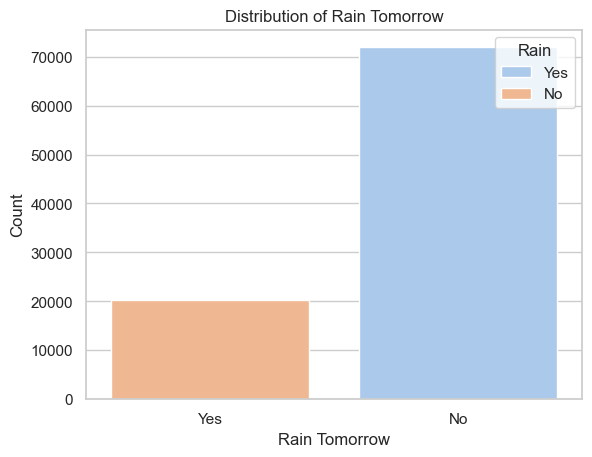

<Figure size 600x400 with 0 Axes>

In [89]:
sns.set(style="whitegrid", palette="pastel")

sns.countplot(x='RainTomorrow', data=weather_data_rain, hue='RainTomorrow',dodge=False,order=[1,0])

plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.title('Distribution of Rain Tomorrow')

plt.legend(title='Rain', loc='upper right', labels=['Yes', 'No'])

# Set custom labels for x-axis, position 0 -> yes, position 1 -> no 
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'])

plt.figure(figsize=(6, 4))

plt.show()

## The dependency between our target variable and other categorical variables

### The chi-square test - categorical vs. categorical variable
The Chi-square test is used to determine if there is a significant association between two categorical variables. 
Process for conducting a Chi-square test:
1. Formulate the null and alternative hypotheses:
Null hypothesis: There is no association between the two categorical variables.
Alternative hypothesis: There is a significant association - || - 
2. Set the significance level (alpha): Choose a significance level (commonly 0.05) that represents the threshold for determining statistical significance. The significance level determines how strong the evidence against the null hypothesis must be before we reject it.
3. Create a contingency table (cross-tabulation)- a table that shows the observed frequencies for each combination of the two categorical variables.
4. Compute the Chi-square test statistic - you calculate the difference between the observed and expected frequencies and then you sum up them.
5. Find p-value
6. Comparison: If the p-value is < 0.05, reject the null hypothesis - there is a significant association between the variables. If The p-value >= 0.05 reject alternative hypothesis - there is no significant association.
7. Chi-square statistic: The bigger difference, the stronger association between the variables. When the test statistic is large, it suggests that there is a significant discrepancy between the observed and expected frequencies, indicating that the variables are dependent.

#### I added also Cramer's V, which is an extension of the chi-square test and provides a standardized measure of association.
Cramer's V ranges from 0 to 1, where 0 indicates no association between the categorical variables, and 1 indicates a perfect association. The formula for Cramer's V is:

$$
V = \sqrt{\frac{\chi^2}{(n \cdot min (k-1,r-1)}}
$$

Where:

$\chi^2$  is the chi-square statistic obtained from the chi-square test of independence between the two categorical variables.

n is the total number of observations in the contingency table.

k is the number of rows in the contingency table.

r is the number of columns in the contingency table.

In [77]:
from scipy.stats import chi2_contingency
def chi_square_test(categorical_var_1, categorical_var_2):
    crosstab = pd.crosstab(categorical_var_1, categorical_var_2)
    chi2, p, _, _ = chi2_contingency(crosstab)
    n = crosstab.sum().sum()
    # crosstab.sum() - the sum of elements along each column of the contingency table
    # crosstab.sum().sum() - the sum of all elements in the 1-dimensional array obtained from the previous step
    num_rows = crosstab.shape[0]
    num_cols = crosstab.shape[1]
    cramer_v = np.sqrt(chi2 / (n * min(num_rows - 1, num_cols - 1)))
    return chi2, p, cramer_v

def chi_square_contigency(tab_x, tab_x_str, var,sort=1):
    df = pd.DataFrame(columns=['Variable', 'Chi-square', 'P-value',"Cramer's V"])
    for x, x_str in zip(tab_x, tab_x_str):
        chi2, p, cramer_v = chi_square_test(var, x)
        result = pd.DataFrame({'Variable': [x_str], 'Chi-square': [round(chi2,2)], 'P-value': [p], "Cramer's V":[round(cramer_v,2)]})
        df = pd.concat([df, result], ignore_index=True)
        if sort:
            df = df.sort_values("Cramer's V",ascending=False)
    return df


In [78]:
# Problem 1) Cloud's type is by default float, so I need to change it:
cloud_categories = {
    0: 'Clear',
    1: 'Few Clouds',
    2: 'Partly Cloudy',
    3: 'Mostly Cloudy',
    4: 'Cloudy',
    5: 'Overcast',
    6: 'Obscured',
    7: 'Mostly Obscured',
    8: 'Completely Overcast',
    9: 'Sky Obscured'
}

cloud_9am = weather_data_rain['Cloud9am'].map(cloud_categories).astype('category')
cloud_3pm =  weather_data_rain['Cloud3pm'].map(cloud_categories).astype('category')

#other categorical variables
location = weather_data_rain['Location']
state = weather_data_rain['State/Province']
wind_gust = weather_data_rain['WindGustDir']
wind_9am = weather_data_rain['WindDir9am']
wind_3pm = weather_data_rain['WindDir3pm']
rain_today = weather_data_rain['RainToday']

# 'RainTomorrow' - 0 if will be raining 1 if not - change to an object
rain_tomorrow = weather_data_rain['RainTomorrow'].map({0:'No',1:'Yes'})

categorical_tab = np.array([location,state,wind_gust,wind_9am,wind_3pm,cloud_9am,cloud_3pm,rain_today,rain_tomorrow])
categorical_tab_str = np.array(['location','state','wind_gust','wind_9am','wind_3pm','cloud_9am','cloud_3pm','rain_today','rain_tomorrow'])

In [79]:
#"correlation does not imply causation". It means that just because two variables show a statistical relationship (correlation) does not necessarily mean that one variable causes the other to change.
# pd.set_option('display.max_columns', None)
# pd.crosstab(cloud_3pm,rain_tomorrow)
# pd.crosstab(cloud_9am,rain_tomorrow)
# pd.crosstab(rain_tomorrow,location)
# pd.crosstab(rain_tomorrow,state)
# pd.crosstab(rain_tomorrow,wind_gust)
# pd.crosstab(rain_tomorrow,wind_9am)
# pd.crosstab(rain_tomorrow,wind_3pm)
# pd.crosstab(rain_tomorrow,rain_today)

In [80]:
chi_square_test(rain_tomorrow, state)

(342.0504092691533, 4.501596406592568e-69, 0.060929557416979696)

In [81]:
chi_square_contigency(categorical_tab,categorical_tab_str,rain_tomorrow,0)
chi_square_contigency(categorical_tab,categorical_tab_str,rain_tomorrow)

,Variable,Chi-square,P-value,Cramer's V
8,rain_tomorrow,92131.16,0.000000e+00,1.00
0,rain_today,9145.94,0.000000e+00,0.32
1,cloud_3pm,5349.89,0.000000e+00,0.24
2,cloud_9am,3738.86,0.000000e+00,0.20
3,location,2432.32,0.000000e+00,0.16
4,wind_9am,1281.99,3.941722e-264,0.12
5,wind_gust,1038.55,7.346711e-212,0.11
6,wind_3pm,885.00,5.721234e-179,0.10
7,state,342.05,4.501596e-69,0.06


**In summary**
The large chi-squares and small p-values (close to 0) indicate strong evidence against the null hypothesis and prove that there is a significant association between rain_tomorrow and other variables. Moreover,The strength of association varies, with some variables exhibiting stronger associations (Cramer's V closer to 1) and others having weaker associations (Cramer's V closer to 0). 

## How are the other categorical variables related to each other?

In [82]:
cramers_v_table = pd.DataFrame()
for index, col in enumerate(categorical_tab):
    cramers_v_table[index]=chi_square_contigency(categorical_tab,categorical_tab_str,col,0)["Cramer's V"]
cramers_v_table

,0,1,2,3,4,5,6,7,8
0,1.00,1.00,0.20,0.20,0.19,0.13,0.12,0.16,0.16
1,1.00,1.00,0.18,0.16,0.19,0.06,0.06,0.06,0.06
2,0.20,0.18,1.00,0.23,0.34,0.03,0.04,0.15,0.11
3,0.20,0.16,0.23,1.00,0.19,0.04,0.04,0.19,0.12
4,0.19,0.19,0.34,0.19,1.00,0.03,0.03,0.14,0.10
5,0.13,0.06,0.03,0.04,0.03,1.00,0.16,0.20,0.20
6,0.12,0.06,0.04,0.04,0.03,0.16,1.00,0.17,0.24
7,0.16,0.06,0.15,0.19,0.14,0.20,0.17,1.00,0.32
8,0.16,0.06,0.11,0.12,0.10,0.20,0.24,0.32,1.00


In [83]:
keys = np.arange(9)
values = categorical_tab_str
new_names = {}
for i in range(len(keys)):
    new_names[keys[i]]=values[i]
# new_names

In [84]:
cramers_v_table.rename(columns=new_names, inplace=True)
cramers_v_table.rename(index=new_names, inplace=True)
cramers_v_table

def color_negative_red(val):
    color = 'red' if val > 0.5 else 'black'
    return 'color: %s' % color

cramers_v_table.style.applymap(color_negative_red)

,location,state,wind_gust,wind_9am,wind_3pm,cloud_9am,cloud_3pm,rain_today,rain_tomorrow
location,1.000000,1.000000,0.200000,0.200000,0.190000,0.130000,0.120000,0.160000,0.160000
state,1.000000,1.000000,0.180000,0.160000,0.190000,0.060000,0.060000,0.060000,0.060000
wind_gust,0.200000,0.180000,1.000000,0.230000,0.340000,0.030000,0.040000,0.150000,0.110000
wind_9am,0.200000,0.160000,0.230000,1.000000,0.190000,0.040000,0.040000,0.190000,0.120000
wind_3pm,0.190000,0.190000,0.340000,0.190000,1.000000,0.030000,0.030000,0.140000,0.100000
cloud_9am,0.130000,0.060000,0.030000,0.040000,0.030000,1.000000,0.160000,0.200000,0.200000
cloud_3pm,0.120000,0.060000,0.040000,0.040000,0.030000,0.160000,1.000000,0.170000,0.240000
rain_today,0.160000,0.060000,0.150000,0.190000,0.140000,0.200000,0.170000,1.000000,0.320000
rain_tomorrow,0.160000,0.060000,0.110000,0.120000,0.100000,0.200000,0.240000,0.320000,1.000000


In [85]:
# for analysis remove location or state (coordinates?)

In [86]:
#print("\033[31mI did not know \033[32;1mthat I can so much change the style \033[33mof the text \033[0min python")



In [87]:
# https://colorhunt.co/palettes/vintage